In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adam
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

In [3]:
X, y = make_moons(n_samples=1000, noise=0.1, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=42)

In [4]:
model = Sequential()
model.add(Dense(1, input_shape=(2,), activation='sigmoid'))
model.compile(Adam(learning_rate=0.05), 'binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=200, verbose=0)
results = model.evaluate(X_test, y_test)
print("The Accuracy score on the Train set is:\t{:0.3f}".format(results[1]))

10/10 [==============================] - 0s 435us/step - loss: 0.3181 - accuracy: 0.8433
The Accuracy score on the Train set is:	0.843


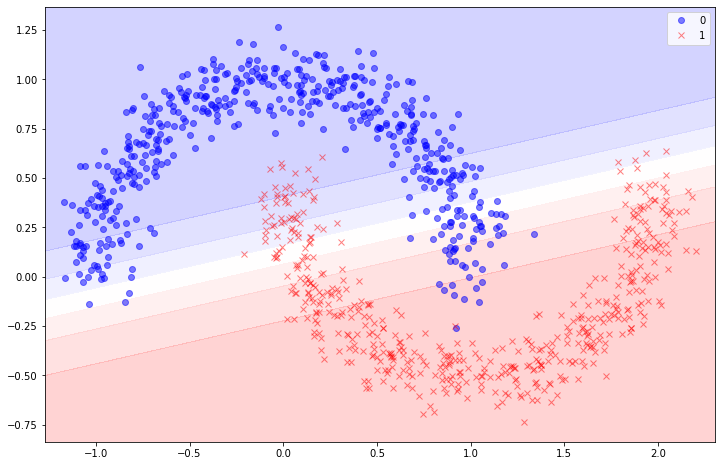

In [5]:
def plot_decision_boundary(model, X, y):
    amin, bmin = X.min(axis=0) - 0.1
    amax, bmax = X.max(axis=0) + 0.1
    hticks = np.linspace(amin, amax, 101)
    vticks = np.linspace(bmin, bmax, 101)
    
    aa, bb = np.meshgrid(hticks, vticks)
    ab = np.c_[aa.ravel(), bb.ravel()]
    
    c = model.predict(ab)
    cc = c.reshape(aa.shape)

    plt.figure(figsize=(12, 8))
    plt.contourf(aa, bb, cc, cmap='bwr', alpha=0.2)
    plt.plot(X[y==0, 0], X[y==0, 1], 'ob', alpha=0.5)
    plt.plot(X[y==1, 0], X[y==1, 1], 'xr', alpha=0.5)
    plt.legend(['0', '1'])
    
plot_decision_boundary(model, X, y);

#### Maak een schets van het neurale netwerk. Geef daarin de weegfactoren weer die moeten worden bepaald tijdens de training
![schets_5.1](images/schets_5.1.png)

#### Waarom werkt het shallow model hier niet?
Het shallow model werkt in het geval van deze dataset niet omdat de structurering 
van data erg complex is en overlap vertoond met eerder gedefinierde coordinaten op
x-y assen. Door de complexiteit en overlap van datapunten in de assen is het voor een
neuraal netwerk vrijwel onmogelijk om met 2 lagen of minder dit complexe gedrag te beschrijven.